# Silla de oficina

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

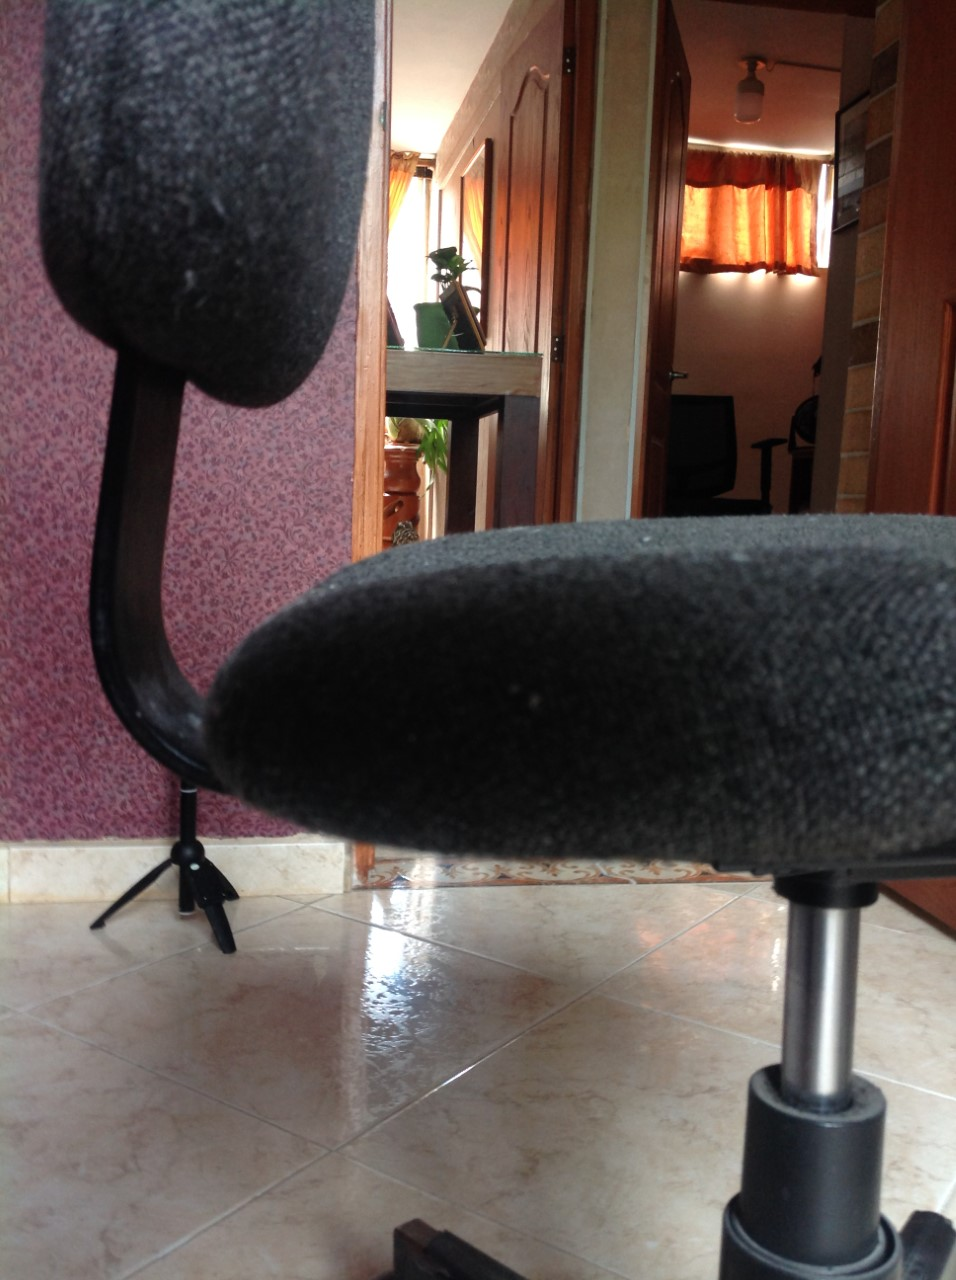

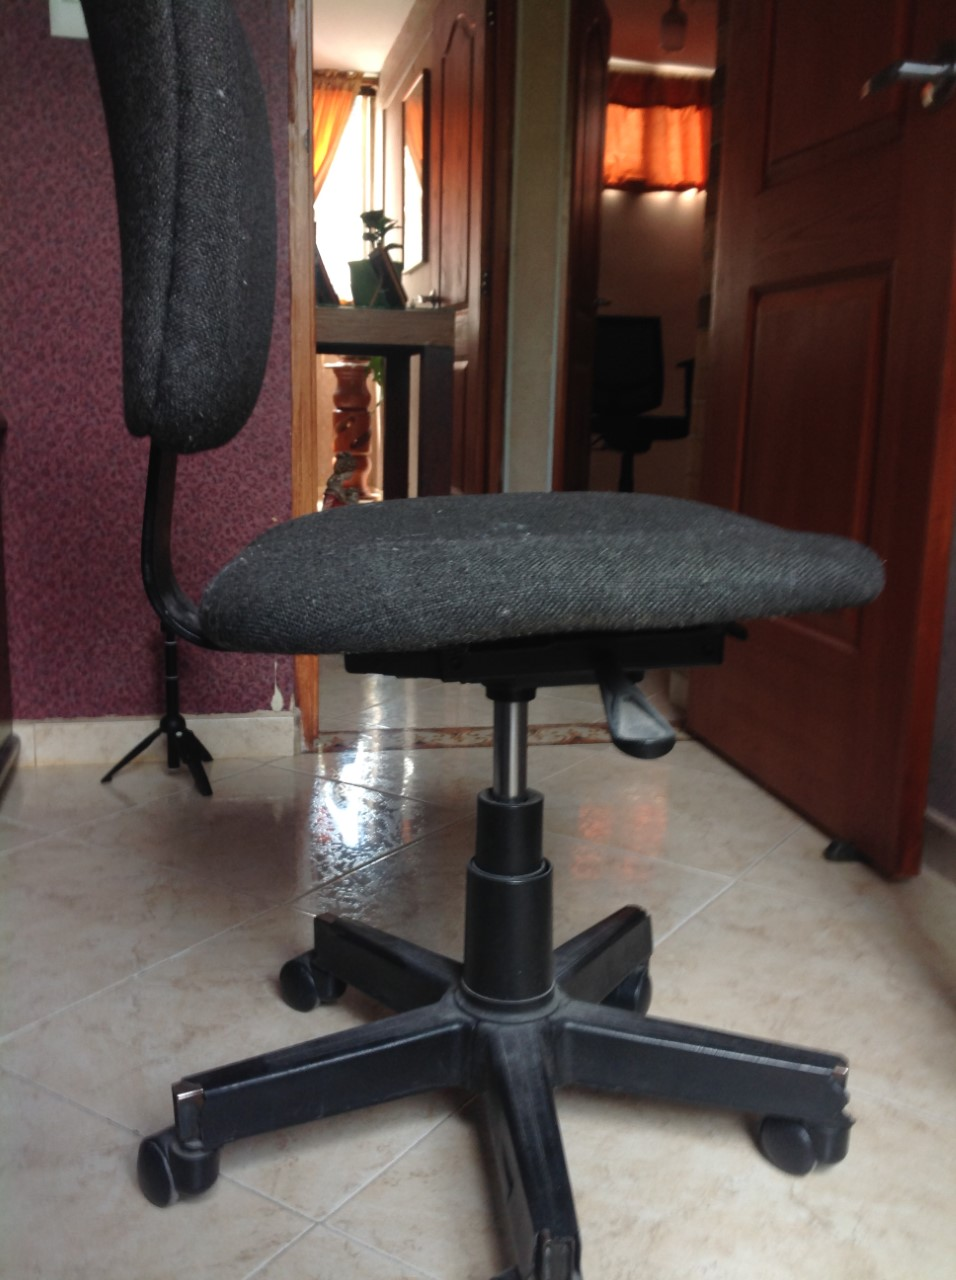

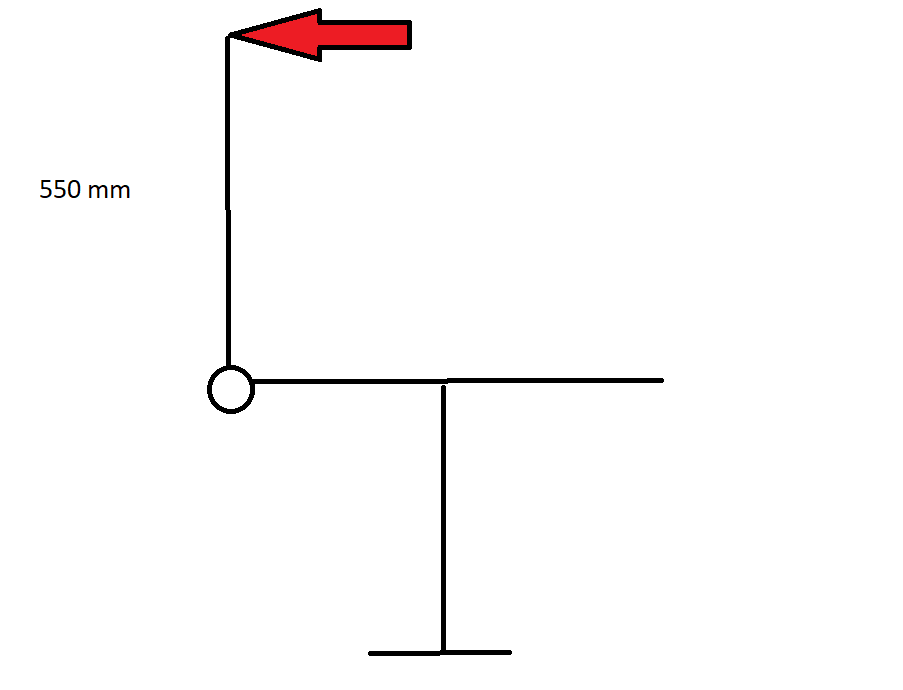

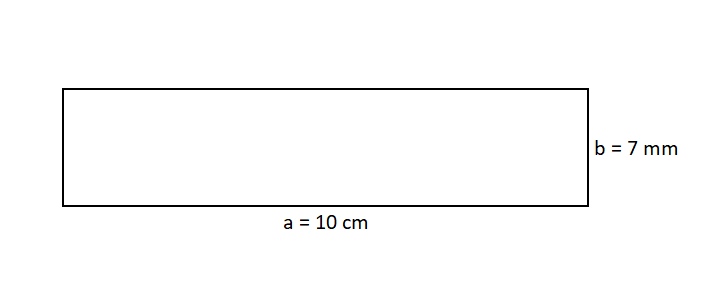

## Load state

In [3]:
# Properties
a = 0.1
b = 8/1000
L = 550/1000
StressYield = 1180e6 # AISI 1080
FatigueStregth = 479e6 # At 10^7 ciclos
FractureToughness = 27e6

Weight = 85
Moment = L*(0.5*Weight*9.81)
Inertia = (a*b**3)/12
StressReal = Moment*(b/2)/Inertia
print('Stress Real =', StressReal/1e6)

Stress Real = 214.97695312499997


## One-time use

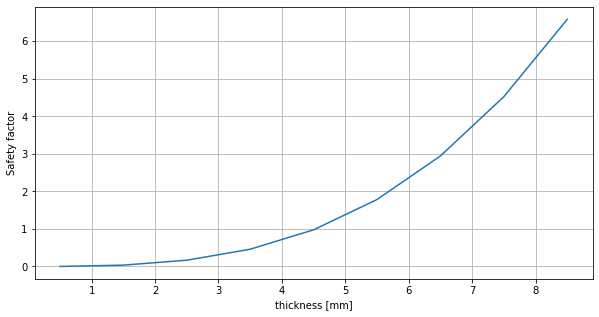

RatioWeight = 1.7777777777777781
WeightDifference = 1.5400000000000005


In [4]:
th1 = np.arange(0.5e-3, 0.009, 1e-3)
Inertia1 = (a*th1**3)/12
StressReal1 = Moment*(b/2)/Inertia1
SFDisposal = StressYield/StressReal1

plt.figure(figsize=(10,5))
plt.plot(th1*1000, SFDisposal)
plt.xlabel('thickness [mm]')
plt.ylabel('Safety factor')
plt.grid()
plt.show()

# 4.5 mm es OK, aproximadamente SF de 6. 

# Efecto en el peso del componente:
RatioWeight1 = (a*b*L)/(a*(4.5/1000)*L)
print('RatioWeight =', RatioWeight1)
WeightDifference = ((a*b*L) - (a*(4.5/1000)*L))*8000
print('WeightDifference =', WeightDifference)

## Safe-life design

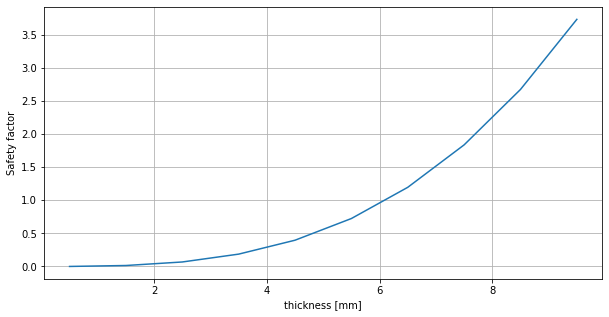

Duration 1e7 = 19.0259


In [5]:
th2 = np.arange(0.5e-3, 0.01, 1e-3)
Inertia2 = (a*th2**3)/12
StressReal2 = Moment*(b/2)/Inertia2
SFLife = FatigueStregth/StressReal2

plt.figure(figsize=(10,5))
plt.plot(th2*1000, SFLife)
plt.xlabel('thickness [mm]')
plt.ylabel('Safety factor')
plt.grid()
plt.show()

# 600 mm es OK.

# Efecto en el peso del componente:
#RatioWeight2 = (a*b*L)/(a*(600/1000)*L)
#print('RatioWeight =', RatioWeight2)
#WeightDifference2 = ((a*b*L) - (a*(600/1000)*L))*8000
#print('WeightDifference =', WeightDifference2)

# Asumiendo que me recuesto una vez por minuto:
Duration = (1e7)*1.90259e-6
print('Duration 1e7 =', Duration)

## Damage-tolerant design

### Considering a through elliptical crack in the middle of the plate

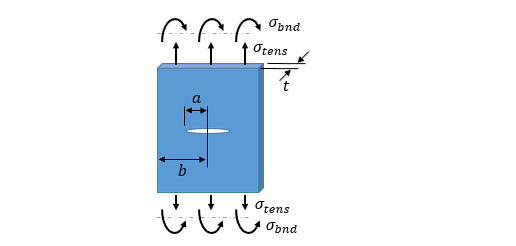

### Stress intensity factor

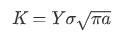

In [6]:
t = np.arange(0.5e-3, 5e-3, 1e-3)
Inertia3 = (a*t**3)/12
StressReal3 = Moment*(b/2)/Inertia3
distance = a/2
CrackSize = np.arange(0.5e-3, 0.01, 10e-3)
GeometryFactorBending = 1e-2*np.sqrt(1/np.cos(np.pi*2*CrackSize/(2*distance)))/2
StressIntensity = GeometryFactorBending*StressReal3*np.sqrt(np.pi*CrackSize)


### Fracture toughness

1.308891123240448


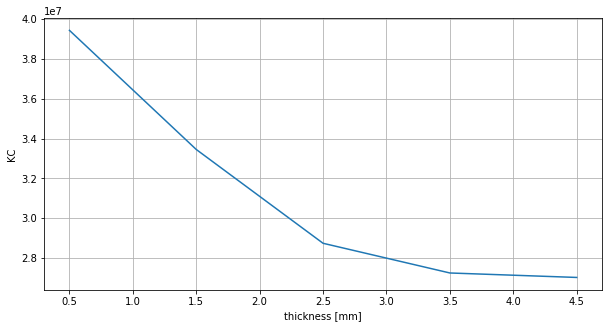

In [9]:
# Assuming plane-strain condition

AK = 0.75
BK = 0.5
t0 = 2.5*((FractureToughness/StressYield)**2)
KC = FractureToughness*(1 + BK*np.exp(-(((AK*t)/t0)**2)))
print(t0*1000)                       

plt.figure(figsize=(10,5))
plt.plot(t*1000, KC)
plt.xlabel('thickness [mm]')
plt.ylabel('KC')
plt.grid()
plt.show()

### Crirtical crack size

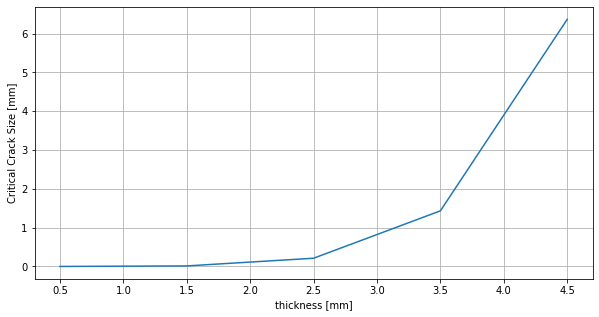

In [8]:
CriticalCrackSize = (((FractureToughness*(1 + BK*np.exp(-(((AK*t)/t0)**2))))/(GeometryFactorBending*StressReal3))**2)/np.pi

plt.figure(figsize=(10,5))
plt.plot(t*1000, CriticalCrackSize)
plt.xlabel('thickness [mm]')
plt.ylabel('Critical Crack Size [mm]')
plt.grid()
plt.show()

Cuanto se demora en desarrollarse una grieta de ese tamaño?